In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
quater_data_labeled_fscore = pd.read_csv("quater_data_labeled_fscore_0723.csv",  converters={'DATE':str,'code':str,'Y':str, 'QUATER':str})

In [12]:
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["N1"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["N16"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["N17"],:]
# quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["N19"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["R3"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["R7"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["VALUE"],:]
# quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["PRICE"],:]
quater_data_labeled_fscore = quater_data_labeled_fscore.loc[-quater_data_labeled_fscore.isnull()["F3"],:]

quater_data_labeled_fscore.drop(['N19'], axis='columns', inplace=True)

print(len(quater_data_labeled_fscore))

quater_data_labeled_fscore.isnull().sum()

1626


DATE       0
code       0
N1         0
N2         0
N3         0
N4         0
N5         0
N8         0
N9         0
N10        0
N13        0
N14        0
N15        0
N16        0
N17        0
R1         0
R2         0
R3         0
R4         0
R5         0
R6         0
N20        0
R7         0
N21        0
R8         0
COUNT      0
VALUE      0
PRICE      0
N_PRICE    0
Y          0
F3         0
F4         0
F5         0
F7         0
F8         0
F9         0
QUATER     0
S1         0
S2         0
S3         0
S4         0
S5         0
S6         0
S7         0
S8         0
S9         0
dtype: int64

In [13]:
quater_data_labeled_fscore = pd.concat([quater_data_labeled_fscore, pd.get_dummies(quater_data_labeled_fscore.QUATER)], axis=1)
quater_data_labeled_fscore.rename(columns={'02':'Q02', '03':'Q03', '08':'Q08', '09':'Q09','11':'Q11', '12':'Q12'}, inplace = True)
quater_data_labeled_fscore = quater_data_labeled_fscore.reset_index(drop = True)
quater_data_labeled_fscore.tail(3)

DATE    code     N1     N2    N3     N4  ...  Q02  Q03  Q08  Q09  Q11  Q12
1623  201809  900140  628.0 -149.0   6.0  -39.0  ...    0    0    0    1    0    0
1624  201812  900140  905.0 -149.0 -96.0 -321.0  ...    0    0    0    0    0    1
1625  201903  900140  692.0  -77.0   9.0  -41.0  ...    0    1    0    0    0    0

[3 rows x 52 columns]

In [14]:
from sklearn import preprocessing

col_name = [ 'N1', 'N2', 'N3', 'N4', 'N5', 'N8', 'N9', 'N10', 'N13',
       'N14', 'N15', 'N16', 'N17', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6',
       'N20', 'R7', 'N21', 'R8', 'COUNT', 'VALUE', 'F3', 'F4', 'F5', 'F7', 'F8','F9']

# col_name = [ 'N1', 'N2', 'N3', 'N4', 'N5', 'N8', 'N9', 'N10', 'N13',
#        'N14', 'N15', 'N16', 'N17', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6',
#        'N20', 'R7', 'N21', 'R8',  'COUNT', 'VALUE']


## StandardScaler code
std_scaler = preprocessing.StandardScaler()
std_scaler_df = std_scaler.fit_transform(quater_data_labeled_fscore[col_name])
std_scaler_df = pd.DataFrame(std_scaler_df, columns = col_name)

std_scaler_df.tail(3)

N1        N2        N3  ...        F7        F8        F9
1623 -0.329918 -0.260493 -0.196812  ... -0.082977 -0.147952  0.010106
1624 -0.318984 -0.260493 -0.238909  ... -0.082977  0.679728  0.666439
1625 -0.327392 -0.230778 -0.195574  ... -0.082977  0.503547 -0.398716

[3 rows x 31 columns]

In [15]:
new_df = pd.merge(std_scaler_df, quater_data_labeled_fscore[["DATE","code","Y","PRICE","N_PRICE","S1","S2","S3","S4","S5","S6","S7","S8","S9",
                                                             'Q02', 'Q03', 'Q08', 'Q09','Q11', 'Q12']],left_index = True, right_index = True)
new_df["SS"] = new_df["S1"] + new_df["S2"] + new_df["S3"] + new_df["S4"] + new_df["S5"] + new_df["S6"] + new_df["S7"] + new_df["S8"] + new_df["S9"]
new_df["SL"] = new_df["SS"].apply(lambda x: 1 if x > 4 else 0)
new_df['R8_2'] = pow(new_df['R8'],2)
new_df['R8_3'] = pow(new_df['R8'],3)

# new_df = new_df.reset_index(drop = True)
new_df.to_csv("std_month_df_ss.csv",index = True)

new_df.tail(3)


N1        N2        N3        N4  ...   SS  SL      R8_2      R8_3
1623 -0.329918 -0.260493 -0.196812 -0.186969  ...  3.0   0  0.234034 -0.113219
1624 -0.318984 -0.260493 -0.238909 -0.297268  ...  7.0   1  0.320671 -0.181589
1625 -0.327392 -0.230778 -0.195574 -0.187751  ...  6.0   1  0.290279 -0.156396

[3 rows x 55 columns]

In [0]:
# new_df = pd.read_csv("std_month_df_ss.csv", converters={'DATE':str, 'code':str, 'Y':str})

In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV

# random seed number
random_num = 123

y = pd.DataFrame(new_df['Y'])
new_df.drop([item for item in new_df if "Y" in item], axis=1, inplace=True)
new_df.drop([item for item in new_df if "DATE" in item], axis=1, inplace=True)
new_df.drop([item for item in new_df if "code" in item], axis=1, inplace=True)
new_df.drop([item for item in new_df if "PRICE" in item], axis=1, inplace=True)
new_df.drop([item for item in new_df if "N_PRICE" in item], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size=0.3, random_state=random_num, stratify=y)

In [0]:
sel_col_1 = ['N1','N14','N15','N16','N20','R3','R8','VALUE','R8_2','R8_3',"S1","S2","S3","S4","S5","S6","S7","S8","S9","SL"]


x_train_a = x_train[sel_col_1]
x_test_a = x_test[sel_col_1]

## 선형회귀모델 학습

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

pred = pd.DataFrame(lin_reg.predict(x_train))
# pred = pred.reset_index(drop=True)
# x_train = x_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
a = pd.merge(x_train, y_train, left_index = True, right_index = True)
a = pd.merge(a, pred, left_index = True, right_index = True)
a.tail()

N1        N2        N3        N4  ...      R8_2      R8_3  Y         0
5    -0.096133 -0.183730 -0.184018 -0.226864  ...  0.247528 -0.123151  1 -0.044572
1122  1.993206  1.325955  1.325681  1.134669  ...  0.161012 -0.064608  0  0.778141
63   -0.342706 -0.188682 -0.188971 -0.164283  ...  2.602710  4.198930  1  0.043895
436  -0.243477 -0.086331 -0.086618 -0.051637  ...  0.177992 -0.075093  0  0.733406
369   0.573447 -0.272874 -0.273164 -0.242118  ...  0.177992 -0.075093  0  0.128871

[5 rows x 52 columns]

In [0]:
a = pd.merge(a, quater_data_labeled_fscore[["DATE","code","PRICE","N_PRICE"]], left_index = True, right_index = True)
a.tail(3)
a.to_csv("pred_quater_3.csv", index = True)

## Sequentail Model 학습

Using TensorFlow backend.
W0724 06:04:05.552088 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 06:04:05.599650 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 06:04:05.607700 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 06:04:05.630681 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

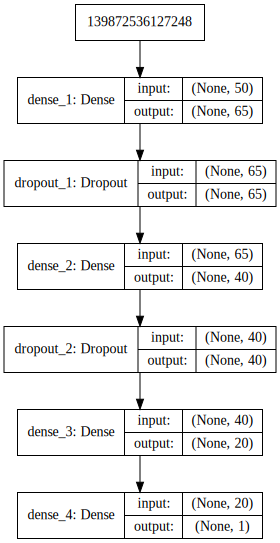

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# np.random.seed(5)

model = Sequential()

# model.add(Dense(80, input_dim=50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(25, activation='relu'))

model.add(Dense(65, input_dim=50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))



In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1500, batch_size=64)

W0724 06:04:13.967383 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 06:04:14.002357 139873726498688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0724 06:04:14.010384 139873726498688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1500
1138/1138 [==============================] - 1s 676us/step - loss: 0.8960 - acc: 0.4912
Epoch 2/1500
1138/1138 [==============================] - 0s 32us/step - loss: 0.8244 - acc: 0.5035
Epoch 3/1500
1138/1138 [==============================] - 0s 25us/step - loss: 0.7924 - acc: 0.5343
Epoch 4/1500
1138/1138 [==============================] - 0s 27us/step - loss: 0.7445 - acc: 0.5624
Epoch 5/1500
1138/1138 [==============================] - 0s 27us/step - loss: 0.7164 - acc: 0.5598
Epoch 6/1500
1138/1138 [==============================] - 0s 29us/step - loss: 0.7106 - acc: 0.5958
Epoch 7/1500
1138/1138 [==============================] - 0s 27us/step - loss: 0.6840 - acc: 0.6090
Epoch 8/1500
1138/1138 [==============================] - 0s 29us/step - loss: 0.7331 - acc: 0.6063
Epoch 9/1500
1138/1138 [==============================] - 0s 36us/step - loss: 0.6966 - acc: 0.6415
Epoch 10/1500
1138/1138 [==============================] - 0s 28us/step - loss: 0.6724 - acc: 0.644

In [21]:
# model.add(Dense(65, input_dim=50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(40, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(20, activation='relu'))

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

488/488 [==============================] - 0s 125us/step
acc: 78.28%
1138/1138 [==============================] - 0s 22us/step
acc: 98.77%


In [0]:
x_test.head(3)

b = pd.merge(x_test, y_test, left_index = True, right_index = True)
b = pd.merge(b, quater_data_labeled_fscore[["DATE","code","PRICE","N_PRICE"]], left_index = True, right_index = True)

b.tail()


N1        N2        N3        N4  ...    DATE    code  PRICE  N_PRICE
774   0.183635 -0.750790 -0.751084 -0.630904  ...  201812  010140   7410     9100
845  -0.337417 -0.193222 -0.193511 -0.168977  ...  201809  012160   1305      971
95   -0.332089 -0.195698 -0.195987 -0.163110  ...  201812  000850  41100    42200
1059 -0.342627 -0.196936 -0.197225 -0.096226  ...  201812  023960   1495     1700
1196 -0.328694 -0.231191 -0.231480 -0.201441  ...  201903  035000   8270     8350

[5 rows x 55 columns]

In [0]:
c = b.reset_index(drop = True)
pred = pd.DataFrame(model.predict(x_test))
b = pd.merge(c, pred, left_index = True, right_index = True)
b.tail()

N1        N2        N3        N4  ...    code  PRICE  N_PRICE         0
483  0.183635 -0.750790 -0.751084 -0.630904  ...  010140   7410     9100  0.002627
484 -0.337417 -0.193222 -0.193511 -0.168977  ...  012160   1305      971  0.000053
485 -0.332089 -0.195698 -0.195987 -0.163110  ...  000850  41100    42200  0.996260
486 -0.342627 -0.196936 -0.197225 -0.096226  ...  023960   1495     1700  1.000000
487 -0.328694 -0.231191 -0.231480 -0.201441  ...  035000   8270     8350  0.975516

[5 rows x 56 columns]

In [0]:
stock_df = pd.read_csv("stock_df.csv", converters={'code':str, 'NAME':str, 'OPEN_DATE':str, 'BIZ_CD':str,'BIZ_NM':str})
stock_df = stock_df[['code', 'BIZ_CD','BIZ_NM']]

b = pd.merge(b, stock_df, on = 'code')
b.tail(3)

N1        N2        N3  ...         0  BIZ_CD       BIZ_NM
485  0.183635 -0.750790 -0.751084  ...  0.002627   33101  선박 및 보트 건조업
486 -0.337417 -0.193222 -0.193511  ...  0.000053   32401    1차 철강 제조업
487 -0.342627 -0.196936 -0.197225  ...  1.000000   64102       토목 건설업

[3 rows x 58 columns]

In [0]:
b.to_csv("pred_layer_quater_0723.csv", index = True, encoding = 'ms949')

In [0]:
# model.add(Dense(80, input_dim=50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(25, activation='relu'))

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

344/344 [==============================] - 0s 337us/step
acc: 75.29%
800/800 [==============================] - 0s 23us/step
acc: 98.88%
